In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df0 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\03_Feature_Engineering\Data_Activity_Projection.csv')

df0.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Total_Skills,Sum_Skills_Off,Sum_Skills_Off_ab_avg
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,11,1
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,6,0
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,3,10,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,15,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,10,1


In [3]:
df1 = df0.drop(columns=["Sum_Skills_Off_ab_avg"], inplace=False)
df1.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Total_Skills,Sum_Skills_Off
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,11
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,6
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,3,10
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,15
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,10


In [4]:
print(df1.sum(axis=0))


Agriculture        111
Animal Care        108
Art                106
Beauty             117
Dance              101
Music              111
Writing            114
Language           106
Health             121
Sports             122
Food               134
Technology         120
Photo              109
Video              121
Total_Skills      1601
Sum_Skills_Off    7753
dtype: int64


In [5]:
df1.shape

(800, 16)

# 1. KNN Regressor model

## 1.1 Model training

In [6]:
X = df1.iloc[:, :-1]  
y = df1.iloc[:, -1:]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=50)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=50)

## 1.2 Model evaluation

In [10]:
# Training set evaluation
y_train_pred = knn_regressor.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R²) Score:", train_r2)

NameError: name 'knn' is not defined

In [ ]:
# Test set evaluation
y_test_pred = knn.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R²) Score:", test_r2)


Test Set Metrics:
Mean Absolute Error (MAE): 3.125
Mean Squared Error (MSE): 15.675
Root Mean Squared Error (RMSE): 3.959166578965831
R-squared (R²) Score: -0.003240129605184272


### Cross validation

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)

cv_scores = cross_val_score(knn_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-cv_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

Mean RMSE: 4.2677865077325965
Standard Deviation of RMSE: 0.12449226648916042


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=200)

cv_scores = cross_val_score(knn_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-cv_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

Mean RMSE: 3.963261953962801
Standard Deviation of RMSE: 0.15025227709077116


## 1.3 Performance improvement

### Hyperparameter tuning

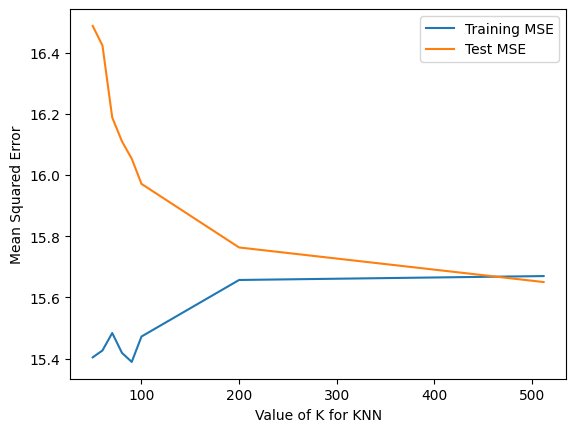

In [ ]:
max_neighbors = min(512, len(X_train))

k_range = [50, 60, 70, 80, 90, 100, 200, max_neighbors]
train_scores = []
test_scores = []

for k in k_range:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)  # Train the model on the training set
    
    # Predict on the training set
    y_train_pred = knn_regressor.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_scores.append(train_mse)
    
    # Predict on the test set
    y_test_pred = knn_regressor.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_scores.append(test_mse)

# Plot the results
plt.plot(k_range, train_scores, label='Training MSE')
plt.plot(k_range, test_scores, label='Test MSE')
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [ ]:
max_neighbors = min(512, len(X_train))

k_range = [50, 60, 70, 80, 90, 100, 200, max_neighbors]
best_k = None
best_mse = float('inf')  # Initialize with a large value

for k in k_range:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)  # Train the model on the training set
    
    # Predict on the test set
    y_test_pred = knn_regressor.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Check if this k value gives better performance
    if test_mse < best_mse:
        best_k = k
        best_mse = test_mse

print("Best performing k value on the test set:", best_k)

Best performing k value on the test set: 512


In [ ]:
k = 512

knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)  

y_test_pred = knn_regressor.predict(X_test)
mse_512 = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error for k = 512:", mse_512)

Mean Squared Error for k = 512: 15.650106120109559


# 2. Prepare Model for API 

In [ ]:
import pickle

In [ ]:
with open('Activity_Projection_Model.pkl', 'wb') as file:
    pickle.dump(knn_regressor, file)